### Naive Bayes Classifier in Python

###### https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#19.-k-Fold-Cross-Validation-

In [94]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import warnings

warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv("adult.csv")

In [12]:
df = pd.DataFrame(data)

In [16]:
df.shape

(48842, 15)

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:
df["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [22]:
df["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [24]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [25]:
df["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [65]:
df["workclass"].replace("?", pd.NA, inplace=True)
df["occupation"].replace("?", pd.NA, inplace=True)
df["native-country"].replace("?", np.NaN, inplace=True)

In [66]:
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
16301,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
31510,53,Federal-gov,170354,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
40701,43,Private,129853,10th,6,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,<=50K
6682,25,Private,335522,9th,5,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Mexico,<=50K
38912,64,Self-emp-not-inc,36960,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,>50K


In [67]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [70]:
df.isnull().sum().max() / df.shape[0] * 100

1.7546374022357807

In [71]:
df.dropna(inplace=True)

In [73]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [126]:
x = df.drop("income", axis=1)
y = df["income"]

In [127]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42
)

In [128]:
category_df = [col for col in x_train.columns if df[col].dtype == "object"]
category_df

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [129]:
numerical_df = [col for col in x_train.columns if df[col].dtype != "object"]
numerical_df

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [130]:
x_train[category_df].isnull().mean()

workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
native-country    0.0
dtype: float64

In [131]:
x_train[numerical_df].isnull().mean()

age                0.0
fnlwgt             0.0
educational-num    0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
dtype: float64

In [132]:
x_test[category_df].isnull().mean()

workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
native-country    0.0
dtype: float64

In [133]:
x_test[numerical_df].isnull().mean()

age                0.0
fnlwgt             0.0
educational-num    0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
dtype: float64

In [134]:
y_test.isnull().sum()

0

In [135]:
label_encoding = LabelEncoder()

In [136]:
for i in x_train.columns:
    if i == "fnlwgt" or i == "age":
        pass
    else:
        x_train[i] = label_encoding.fit_transform(x_train[i])

In [137]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33589 entries, 47158 to 16067
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              33589 non-null  int64
 1   workclass        33589 non-null  int32
 2   fnlwgt           33589 non-null  int64
 3   education        33589 non-null  int32
 4   educational-num  33589 non-null  int64
 5   marital-status   33589 non-null  int32
 6   occupation       33589 non-null  int32
 7   relationship     33589 non-null  int32
 8   race             33589 non-null  int32
 9   gender           33589 non-null  int32
 10  capital-gain     33589 non-null  int64
 11  capital-loss     33589 non-null  int64
 12  hours-per-week   33589 non-null  int64
 13  native-country   33589 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.8 MB


In [138]:
for i in x_train.columns:
    if i == "fnlwgt" or i == "age":
        pass
    else:
        x_test[i] = label_encoding.fit_transform(x_test[i])

In [139]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14396 entries, 38267 to 37499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              14396 non-null  int64
 1   workclass        14396 non-null  int32
 2   fnlwgt           14396 non-null  int64
 3   education        14396 non-null  int32
 4   educational-num  14396 non-null  int64
 5   marital-status   14396 non-null  int32
 6   occupation       14396 non-null  int32
 7   relationship     14396 non-null  int32
 8   race             14396 non-null  int32
 9   gender           14396 non-null  int32
 10  capital-gain     14396 non-null  int64
 11  capital-loss     14396 non-null  int64
 12  hours-per-week   14396 non-null  int64
 13  native-country   14396 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 1.2 MB


<Axes: >

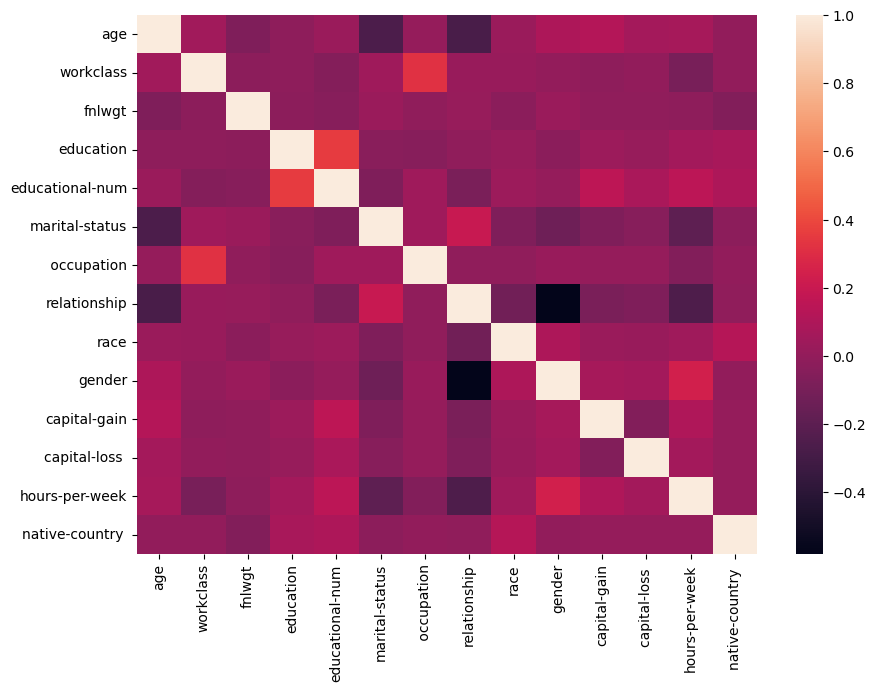

In [165]:
plt.figure(figsize=(10,7))
sns.heatmap(x_train.corr())

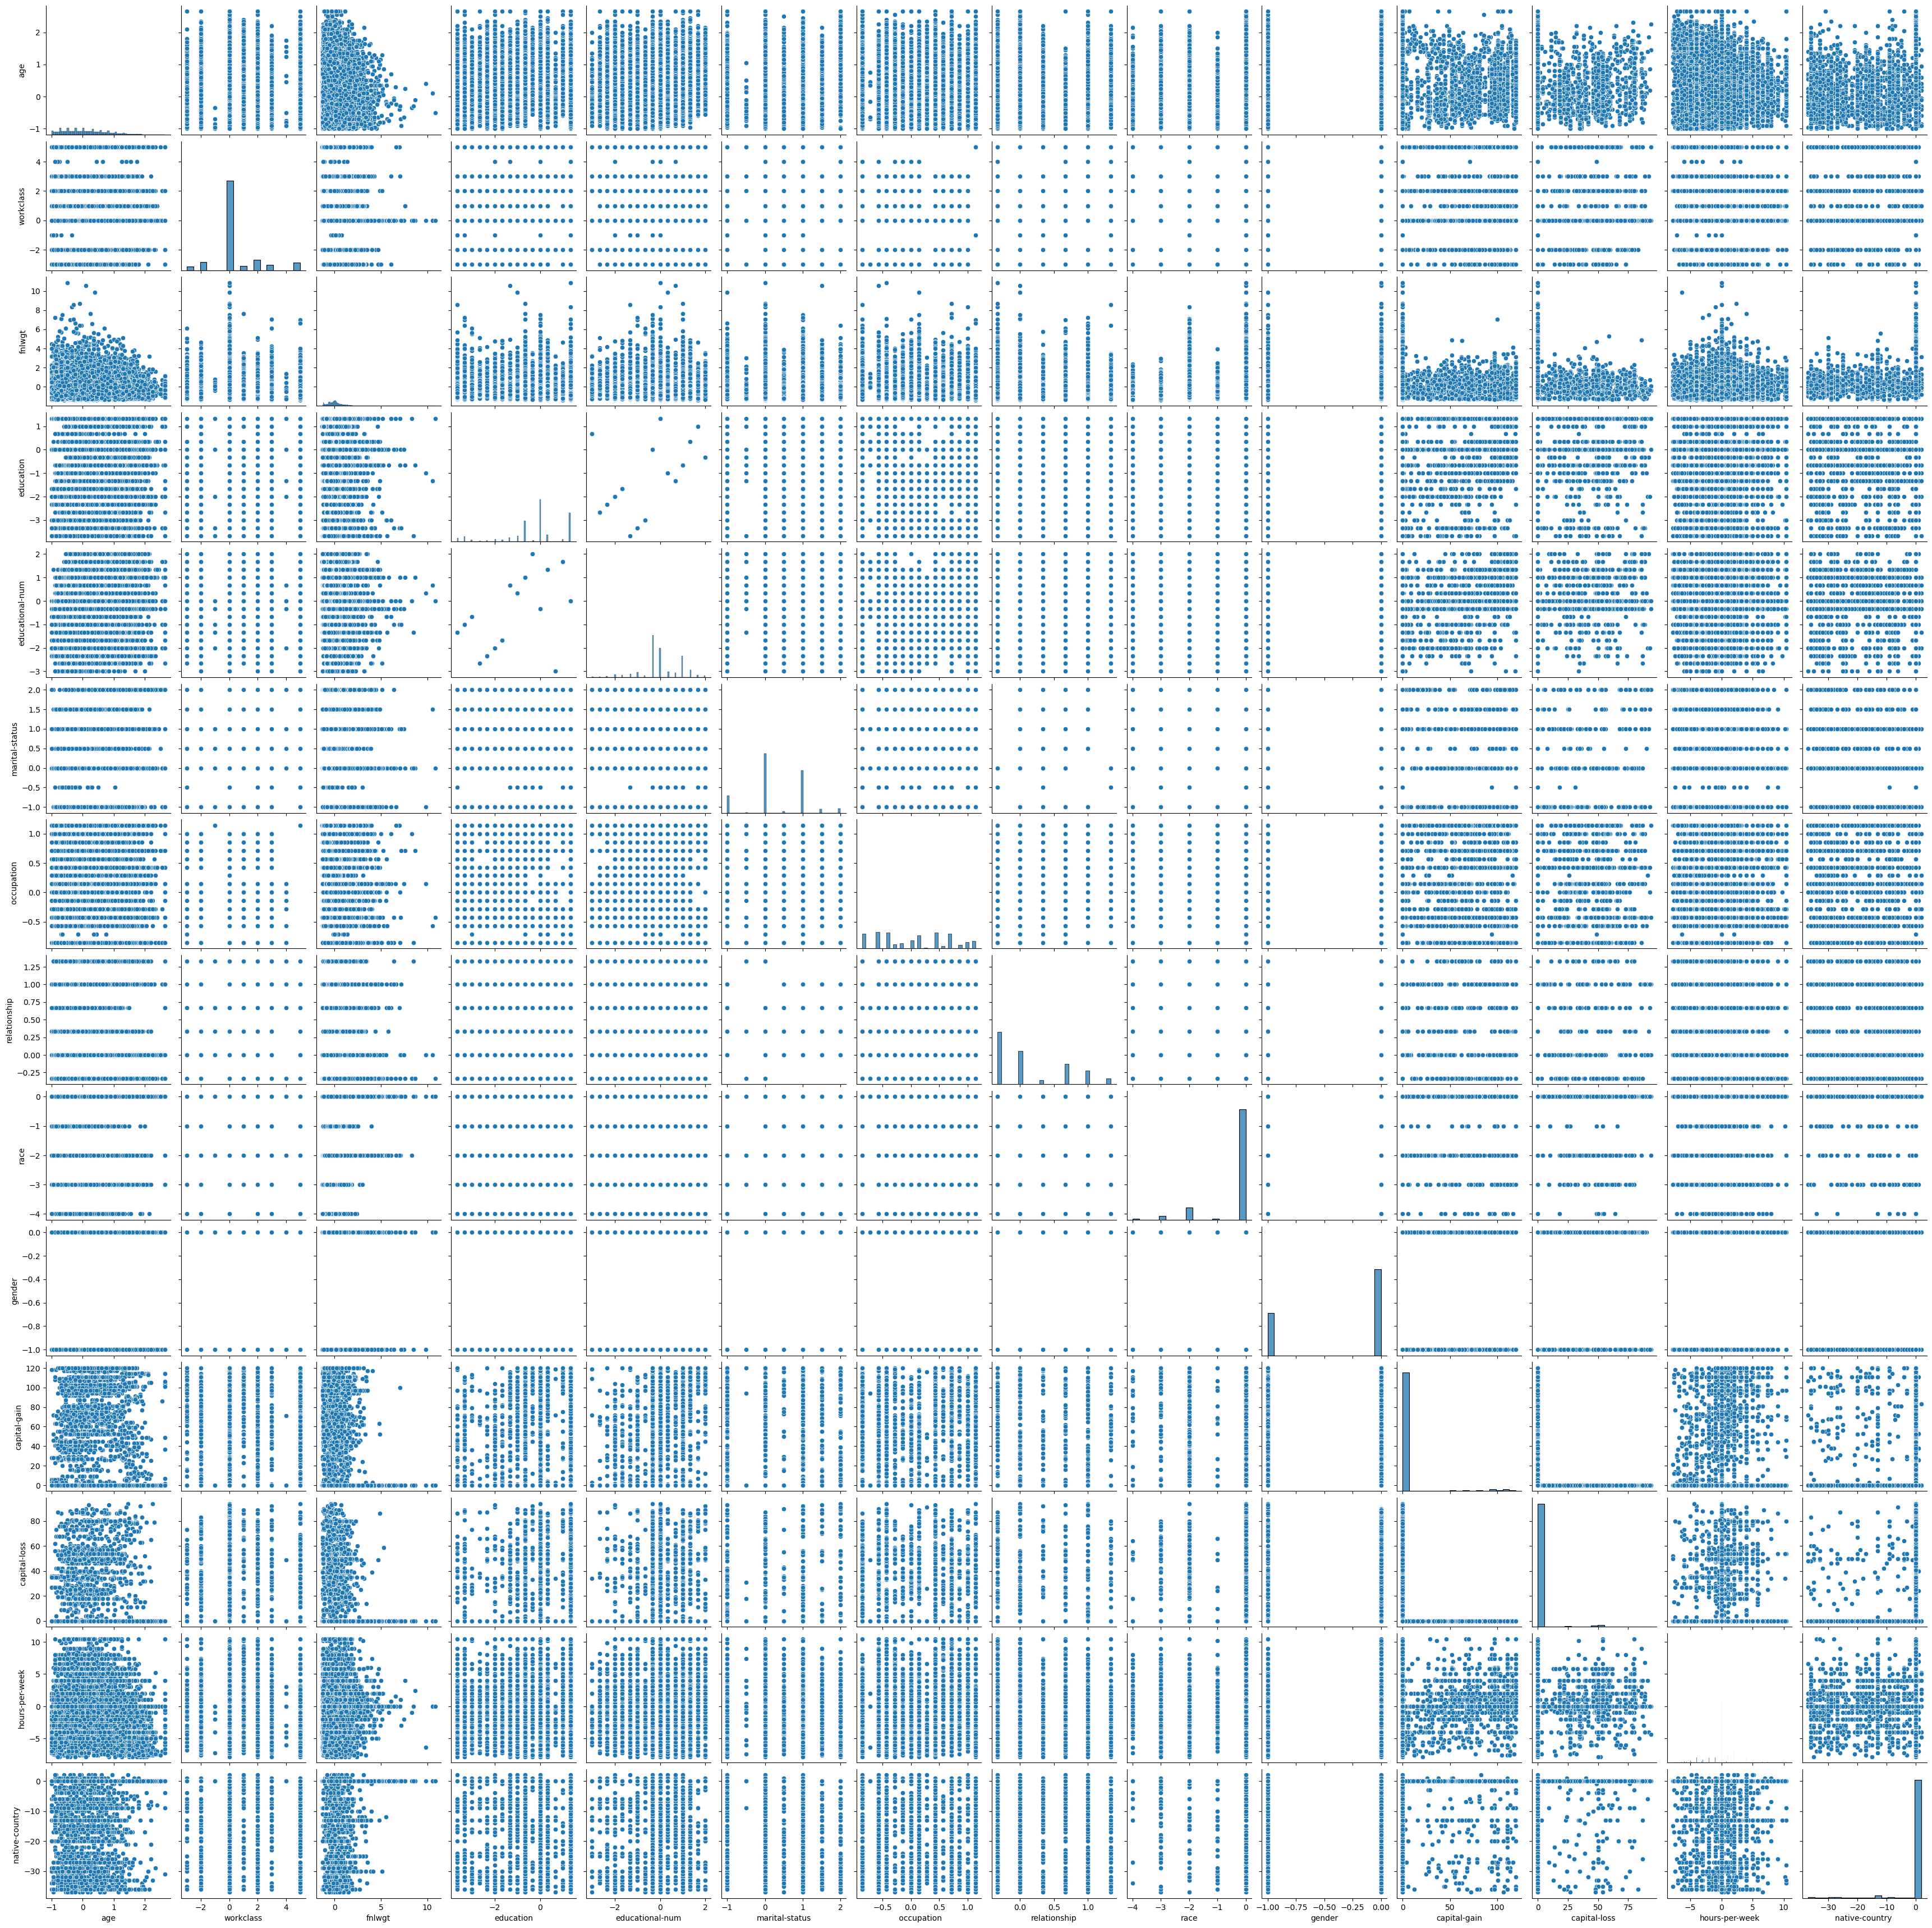

In [166]:
sns.pairplot(x_train)

In [144]:
df_colums = [
    "age"    ,         
    "workclass",        
    "fnlwgt"    ,       
    "education"  ,      
    "educational-num" , 
    "marital-status"   ,
   " occupation"       ,
    "relationship"     ,
    "race"         ,    
    "gender"        ,   
  "capital-gain"    , 
   "capital-loss "    ,
   "hours-per-week"   ,
   "native-country "  
]


In [141]:
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [145]:
x_train = pd.DataFrame(x_train)
x_train.columns = df_colums

In [147]:
x_test = pd.DataFrame(x_test)
x_test.columns = df_colums

In [146]:
x_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.50,0.0,1.502041,0.000000,-0.333333,1.0,-0.142857,0.000000,-2.0,0.0,0.0,0.0,0.0,0.0
1,0.75,5.0,-0.583264,-2.000000,-2.000000,0.0,1.142857,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,0.0,-0.275103,-3.333333,-1.000000,1.0,-0.571429,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.0,-0.052761,0.000000,-0.333333,-1.0,-0.857143,0.333333,-2.0,-1.0,0.0,0.0,0.0,0.0
4,0.50,0.0,-0.425206,1.333333,0.000000,0.0,0.714286,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
x_test.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.25,0.0,-0.425114,-0.666667,1.000000,0.0,0.857143,-0.333333,0.0,0.0,0.0,0.0,1.0,1.0
1,0.25,0.0,-0.091182,1.333333,0.000000,0.0,0.000000,-0.333333,0.0,0.0,0.0,0.0,-1.0,1.0
2,0.55,-3.0,-1.011516,-3.666667,-1.333333,1.0,-0.571429,0.000000,-2.0,0.0,0.0,0.0,0.0,1.0
3,-0.90,0.0,0.595864,1.333333,0.000000,1.0,0.142857,0.666667,0.0,0.0,0.0,0.0,-3.2,1.0
4,0.20,3.0,0.219296,0.333333,1.333333,0.0,-0.428571,-0.333333,0.0,0.0,0.0,0.0,2.0,1.0


In [149]:
gnb = GaussianNB()

In [152]:
gnb.fit(x_train, y_train)

GaussianNB()

In [155]:
print("Training set score: {:.4f}".format(gnb.score(x_train, y_train)))
print("Test set score: {:.4f}".format(gnb.score(x_test, y_test)))

Training set score: 0.8228
Test set score: 0.8240


In [153]:
y_pred = gnb.predict(x_test)
y_pred

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [208]:
print("Model accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8240


In [211]:
df_test = pd.DataFrame(
    {"y_pred": y_pred, "y_obser": y_test,}
)

In [212]:
df_test.head()

,y_pred,y_obser
38267,>50K,>50K
15564,<=50K,<=50K
14769,<=50K,<=50K
25582,<=50K,<=50K
13464,>50K,>50K


In [213]:
df_test["y_pred"] = label_encoding.fit_transform(df_test["y_pred"])
df_test["y_obser"] = label_encoding.transform(df_test["y_obser"])

In [214]:
df_test.head()

,y_pred,y_obser
38267,1,1
15564,0,0
14769,0,0
25582,0,0
13464,1,1


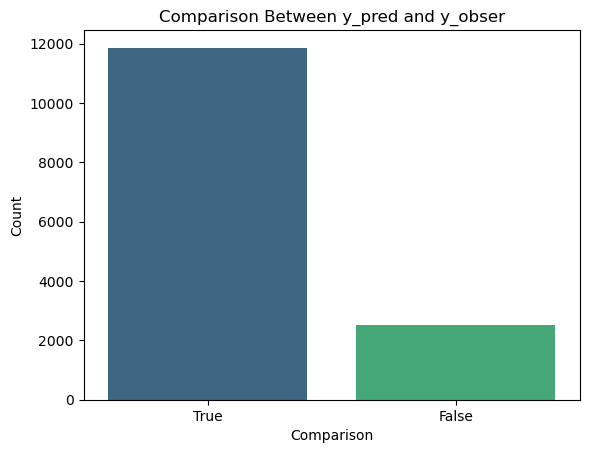

In [224]:
def comparison(row):
    if (row["y_pred"] == 1 and row["y_obser"] == 1) or (
        row["y_pred"] == 0 and row["y_obser"] == 0
    ):
        return "True"
    else:
        return "False"


df_test["comparison"] = df_test.apply(comparison, axis=1)

sns.countplot(x="comparison", data=df_test, palette="viridis")
plt.title("Comparison Between y_pred and y_obser")
plt.xlabel("Comparison")
plt.ylabel("Count")

# Show the plot
plt.show()

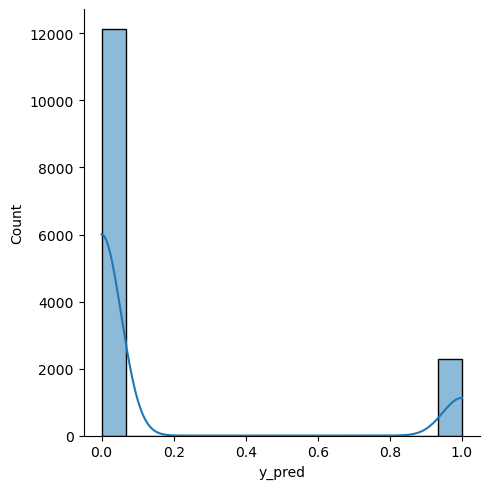

In [206]:
sns.displot(data=df_test["y_pred"], kde=True)

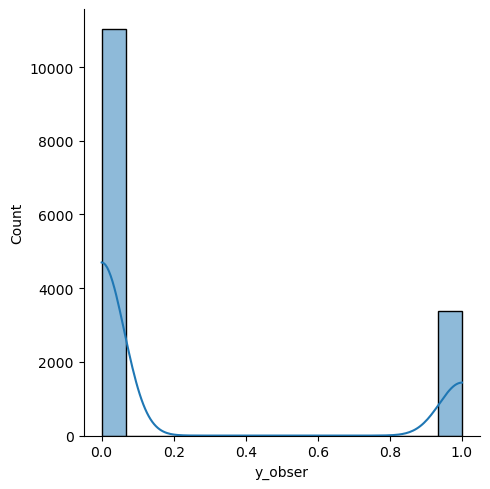

In [195]:
sns.displot(data=df_test["y_obser"], kde=True)